In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from memtools import *

ver()

This is memtools version 1.11


In [2]:
trj=np.loadtxt("example.trj")

xf=xframe(trj[:,1],trj[:,0],fix_time=True)
xvaf=compute_va(xf,correct_jumps=True)

xvaf.head()

,t,x,v,a
#t,,,,
0.01,0.01,-167.663620,58.356476,-16591.949463
0.02,0.02,-167.909653,-99.416351,-14962.615967
0.03,0.03,-169.651947,-231.244659,-11403.045654
0.04,0.04,-172.534546,-324.655914,-7279.205322
0.05,0.05,-176.145065,-376.123810,-3014.373779


Found trajectories with the following legths:
[99998]
Calculate vv, va and aa correlation functions...


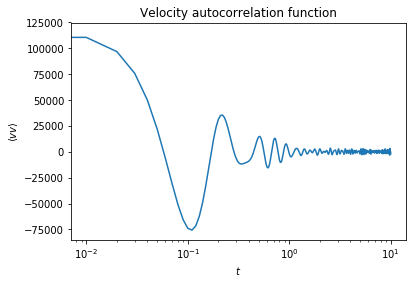

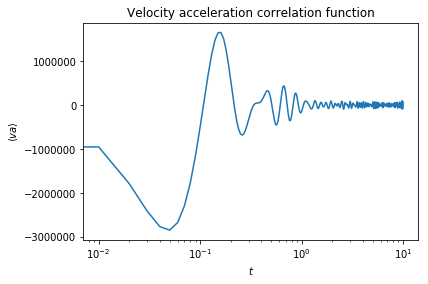

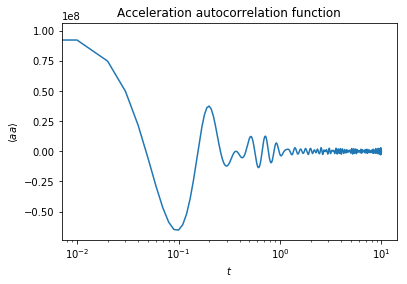

Calculate histogram...
Number of bins: 35
Interpolate... (ignore p=0!)
Assume PERIODIC data.


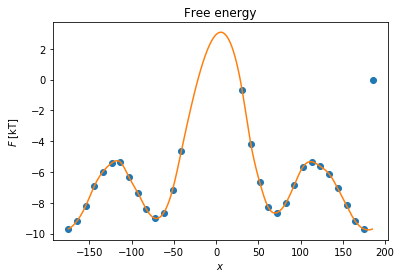

Calculate a/v grad(U(x)) correlation function...


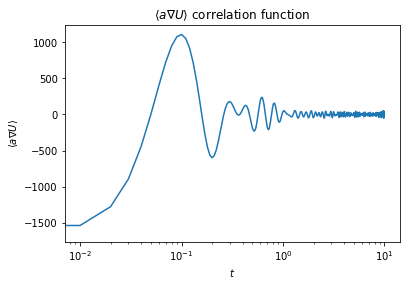

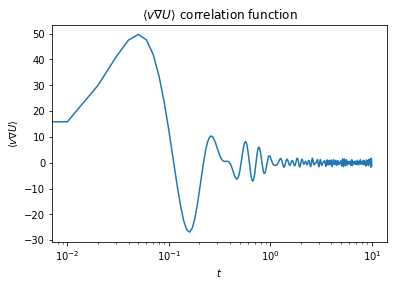

Mass not calculated.
Calculate mass...
Use kT: 2.494
Found mass: 2.16598936854e-05
Use dt: 0.01


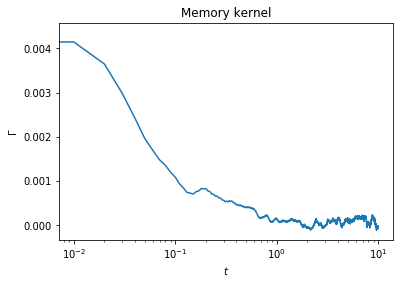

Use dt: 0.01


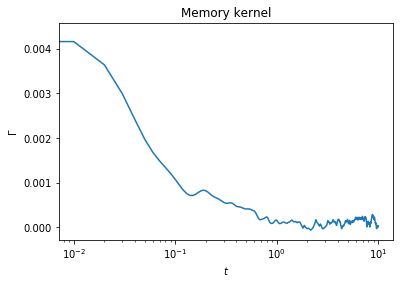

In [3]:
# IglePlot adds verbose plots to Igle, otherwise equivalent
# If you need tab completion for development, use Igle
mymem=IglePlot(xvaf,trunc=10)
#mymem=Igle(xvaf,trunc=10)

mymem.compute_corrs()
mymem.set_periodic(x0=-180,x1=180)
mymem.compute_fe(bins=36)
mymem.compute_u_corr()

kernel_1st=mymem.compute_kernel()
kernel_2nd=mymem.compute_kernel(first_order=False)


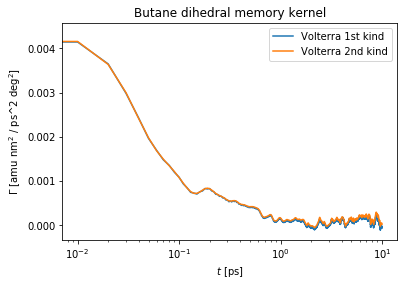

In [4]:
plt.plot(kernel_1st.index,kernel_1st["k"], label="Volterra 1st kind")
plt.plot(kernel_2nd.index,kernel_2nd["k"], label="Volterra 2nd kind")
plt.title("Butane dihedral memory kernel")
plt.xscale("log")
plt.xlabel("$t$ [ps]")
plt.ylabel("$\\Gamma$ [amu nm$^2$ / ps^2 deg$^2$]")
plt.legend(loc='best')    
plt.show()


In [5]:
# Igle supports also lists of xva dataframes
# If your have memory problems with long trajectories, 
# have a look at flist (provided in this package)

xvaf1=xvaf[:len(xvaf/2)]
xvaf2=xvaf[len(xvaf/2):]

xvaf_list=[xvaf1,xvaf2]

mymem_list=Igle(xvaf,trunc=10)

mymem_list.compute_corrs()
mymem_list.set_periodic(x0=-180,x1=180)
mymem_list.compute_fe(bins=36)
mymem_list.compute_u_corr()

kernel_list=mymem_list.compute_kernel()

Found trajectories with the following legths:
[99998]
Calculate vv, va and aa correlation functions...
Calculate histogram...
Number of bins: 35
Interpolate... (ignore p=0!)
Assume PERIODIC data.
Calculate a/v grad(U(x)) correlation function...
Mass not calculated.
Calculate mass...
Use kT: 2.494
Found mass: 2.16598936854e-05
Use dt: 0.01


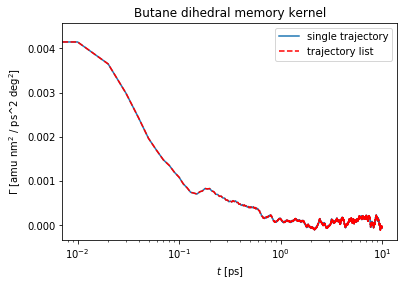

In [6]:
plt.plot(kernel_1st.index,kernel_1st["k"], label="single trajectory")
plt.plot(kernel_list.index,kernel_list["k"], "r--", label="trajectory list")
plt.title("Butane dihedral memory kernel")
plt.xscale("log")
plt.xlabel("$t$ [ps]")
plt.ylabel("$\\Gamma$ [amu nm$^2$ / ps^2 deg$^2$]")
plt.legend(loc='best')    
plt.show()